# Digitale Bilder, Farger og Filtere

Bilder, video og datagrafikk er en av de store grunnene til at vi bruker datamaskiner. Men hvordan fungerer egentlig digitale bilder? I dette opplegget går vi nærmere inn på hvordan digitale bilder er bygget opp og hvordan de lagres som informasjon på en datamaskin. Dette er et stort tema, og man det finnes en rekke tema man kan gå dypere inn på, for eksempel elektromagnetisk stråling, bølgelengder og farger. Menneskesynet og hvordan teknologi er tilpasset oss. Hvordan digital kamerateknologi fungerer og mye mer. I dette dokumentet går vi innom en del ulike temaer for å vise noen interessante ting vi kan gjøre og for å inspirere.

**Plan** 

Dette opplegget begynner med å forstå hvordan et digitalt bilde er bygget opp av piksler, og hvordan informasjonen lagret i et bilde struktures og lagres på datamaskinen. Deretter går vi inn på farger og forstår hvordan fargeinformasjon er enkodet i et digitalt bilde. Når vi forstår dette kan vi enkelt manipulere fargene i bildet matematisk. Deretter går vi litt inn på hvordan menneskesynet fungerer, og vi lager en enkel modell for rød-grønn fargeblindhet. Til slutt ser vi litt på ulike matematiske filtere man kan bruke på bilder.

## Piksler

Et digitalt bilde er bygget opp av *piksler*. Ordet kommer fra det engelske *pixel*  som er en sammenslåing av *picture element*. Et digitalt bilde er som et puslespill, der puslespillbrikkene er pikslene, det er de minste bitene av bildet. Ulikt puslespillbrikker dreimot, så er hver piksel ensfarget.

Når vi ser på et bilde på en skjerm, for eksempel mobilen vår, så ser vi ikke de enkelte pikslene i bildet, fordi de er så små og det er så utrolig mange av dem, som gjør at de smelter litt sammen i synet vårt. Kameraer oppgir ofte hvor mange *megapiksler* de har. Mega er en SI-prefix som betyr million. En iPhone X for eksempel, har et 12 megapixel kamera, det betyr at den kan ta bilder med opp til 12 millioner piksler.

Piksler er også viktig når vi snakker om skjermer, fordi digitale skjermer består også av piksler som kan endre farge utifra hva som skal vises frem. Her gis antall piksler ofte i form av *oppløsning*. En *full HD* skjerm for eksempel, har en oppløsning på "1920x1080", dette betyr at det er 1920 piksler i bredden, og 1080 i høyden. Altså har en *full HD* skjerm altså totalt:
$$1920 \cdot 1080 =  2,073,600.$$
Med over 2 millioner piksler i en skjerm er det kanskje ikke så rart at du ikke klarer å se de individuelle pikslene i en dataskjerm eller mobilskjerm. Men om du ser en gammel TV med lavere oppløsning, eller har et bra forstørrelsesglass, så skal du kunne se de enkelete pikslene.

### Koordinatesystemet i bildet

Et bilde består av piksler, og for hver piksel må vi ha informasjon om hvilken farge pikselen skal ha. Et digitalt bilde er egentlig bare en lang liste med farger på pikslene. Men for å vite hvilken farge som hører til hvilken piksel er det viktig at vi har et ryddig system, så det ikke blir noe surr.

Digitale bilder er alltid rektangler, som gjør ting veldig mye lettere for oss, for da vet vi at pikslene ligger i et helt vanlig rutenett. Det er derfor vanlig å bruke et koordinatsystem, tilsvarende det vi bruker i mattetimen. Når vi snakker om koordinatsystemet til bilder er det vanlig å tenke på det som å lese en tekst, så vi starter i hjørnet øverst til venstre. Vi lar denne pikselen få koordinatene $(0, 0)$. Når vi beveger oss mot venstre langs den øverste linjen med pixler lar vi den andre koordinaten øke, så vi får $(0, 1)$, så $(0, 2)$ osv. Når vi beveger oss ned en rad hopper vi også tilbake til venstre side, så der finner vi først $(1,0)$, så $(1,1)$ osv. 
<img src="fig/koordinatsystem_piksler.png" width=700></img>
I dette eksempelbilde er piksel (0,0) gul, piksel (0, 1) gul, piksel (0, 2) lilla, osv.

Et digitalt bilde er egentlig bare informasjonen om hvilken fargeverdi hver piksel i bildet skal ha. Det er altså bare en lang liste med informasjon av typen
* $(0, 0) \to $ rød 
* $(0, 0) \to $ lyserød 
* $(0, 1) \to $ blå
* og så videre
Denne listen skrives til en fil på maskinen der informasjonen lagres. Når du vil se på bildet, eller for eksempel skrive det ut, så lester maskinen informasjonen og fargelegger skjermen eller arket utifra informasjonen lagret i filen. Digitale bildefiler er altså litt som oppskrifter for bildene.

Når et bilde typisk består av millioner med piksler er det en ganske lang liste med farger som må lagres! Heldigvis finnes det mange lure trisk man kan bruke for å skrive denne informasjonen langt mer effektivt enn vi vil gjort for hånd. For eksempel trenger vi ikke oppgi koordinatene, vi kan bare la dem være gitt i en gitt rekkefølge som vi er enig om på forhånd. I tilegg lagrer datamaskinen all informasjon som tall, så vi trenger en måte å enkode fargeinformasjon som tall, dette kommer vi tilbake til.


# Gråtonebilder

Vi skal nå begynne å se på faktiske digitale bilder med Python. For å forenkle diskusjonen begynner vi med å se på bilder uten farger. Disse bildene kalles gjerne ofte for svart-hvitt bilder, fordi de ikke har farger. Men for å være litt mer nøyaktig består de egentlig av *gråtoner*, vi kaller dem derfor for gråtone bilder.

Vi skal nå begynne å se på et digitalt bilde med Python. Her kan vi i prinsippet se på hvilket som helst bilde vi har tilgjenglig på datamaskinen eller nett, men vi begynner med noen testbilder som kommer innebygd i en bildepakke som heter `skimage`.

In [1]:
from pylab import *
gray() # Nødvendig for at gråtonebilder skal vises riktig

In [2]:
from skimage import data

img = data.camera()

Her oppretter vi en variabel `img`, som inneholder et eksempelbilde av en kameramann. Vi kan vise frem bilder med kommandoen `imshow` (som står for "image show"). Tilsvarende som når vi plotter ender vi med en `show()` kommando:

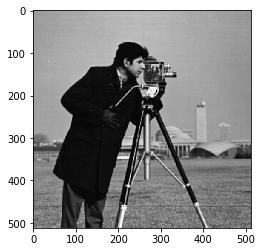

In [3]:
imshow(img)
show()

I tilegg til å vise frem selve bildet ser vi at det er akser på sidene som viser pikselkoordinatsystemet. Om du ikke ønsker å ha med dette kan du bruke funksjonen `axis('off')` før du bruker `show`, da vises bare selve bildet.

La oss prøve å printe ut bildet, istedet for å vise det frem, hva skjer da?

In [4]:
print(img)

[[156 157 160 ... 152 152 152]
 [156 157 159 ... 152 152 152]
 [158 157 156 ... 152 152 152]
 ...
 [121 123 126 ... 121 113 111]
 [121 123 126 ... 121 113 111]
 [121 123 126 ... 121 113 111]]


Vi ser at bildet består av masse tall, i en slags tabell. I Python er dette objektet det vi kaller et todimensjonalt *array*, som er en form for det vi i matematikken kaller en *matrise*. Vi kan sjekke dimensjonene til et array som følger

In [5]:
print(img.shape)

(512, 512)


Så vi ser at bildet vårt består av 512x512 tall. Vi ser også at tallene er heltall, og ikke desimaler. De få tallene vi ser skrevet ut over ligger på litt over 100, men la oss sjekke de største og minste tallene i bildet

In [6]:
print(img.min())
print(img.max())

0
255


Så vi ser at bildet består av heltall mellom 0 og 255. Tallene angir mengden lysintensitet som skal være i hver piksel. Det betyr at 0 betyr ingen lys, og en piksel med verdi 0 blir altså helt svart. På den andre siden er 255 maks intensitet, og en piksel med verdi 255 blir helt hvit. I mellom disse to finner vi et spekter av gråtoner. Siden fargeverdiene oppgis som heltall ser vi at det er 256 ulike farger pikslene i bildet kan ta.

Vi kan se selve fargespekteret ved å kalle på `colorbar` før `show`.

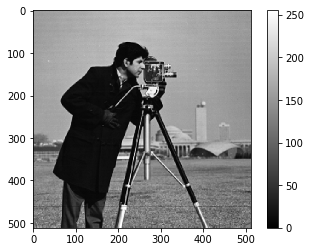

In [7]:
imshow(img)
colorbar()
show()

Du lurer kanskje på hvorfor det er akkurat 256 mulige gråtoner i bildet? Hvorfor ikke 300? Eller 500? Eller 1000? Informasjon på en datamaskin lagres ikke bare som tall, men som en rekke "0" og "1". Dette kalles *totallsystemet*, for det finnes bare to siffer: 0 og 1. Dette er i motsetning til det vanlige tallsystemet vi bruker, som har 10 siffer: 0, 1, 2, ..., 9, og som vi derfor kaller *titallssystemet*.

Totallssystemet fungerer helt likt som titallssystemet: når vi går over det størtste sifferet, så 'ruller' denne rundt, og tallet til venstre øker med 1: for eksempel $9 + 1 = 10$ og $39 + 1 = 40$. Sånn er det i totallsystemet, men vi ruller rundt mye før. Ta for eksempel $1+1$. Det finnes ingen 2-er vi kan bruke, så vi må rulle rundt og få $10$, så $1+1=10$. Dette ser kanskje veldig rart ut, men det er bare fordi tallet til venstre er ikke på "10-er plassen", men på "2-er plassen".

Når vi lagrer informasjon om bilder i en fil lønner det seg om hver piksel bruker like mange siffer i informasjonen sin, sånn at datamaskinen skjønner hvor en piksel slutter og den neste begynner. I bildet vi ser på bruker hver piksel 8 siffer, eller 8 *bits*, som vi kaller dem i dataverden. Det betyr at hver piksel består av åtte 0-ere og 1-ere på rad. For eksempel 01001101 og 11010101. Hvor mange forskjellige gråtoner kan vi lage av disse åtte bitsene? For hver av dem, så kan vi velge enten 0 eller 1, så vi har 2 valg for hvert tall, da gir kombinatorikk oss
$$2*2*2*2*2*2*2*2 = 2^8 = 256.$$
Og det er grunnen til at det er 256 mulige gråtoner. Hvis vi ønsker mer mulige nyanser i et svart-hvitt bilde er det fullt mulig å bruke flere bits per piksel. Da vil bildefilen ta større plass, men vi får mer detaljer. Man liker å bruke antall bits som selv er 2-er potenser, så hvis man ønsker å gå opp fra 8 bits er det vanligst å bruke 16, 32 eller 64 bits.

I vårt tilfelle er bildet 8 bits informasjon, dette kan vi dobbeltsjekke ved å skrive ut datatypen til bildet vårt, som gjøres som dette

In [8]:
print(img.dtype)

uint8


Her er `uint8` en forkortelse for "unsigned integer 8-bit". Dette betyr at hver piksel i bildet er et heltall (integer), det er ikke et negativt tall (unsigned), og det består av 8-bit, som vil si det har verdier mellom 0 og 255.

### Hvor mye plass tar bildet?

La oss kjapt se på hvor mye plass bildet tar på datamaskinen. Vi så over at bildet består av 512x512 piksler, så det er totalt
$$512 \cdot 512 {\rm\ piksler} = 262144 {\rm\ piksler}.$$
Hver piksel bruker 8 bit på maskinen, så det blir
$$262144 {\rm\ piksler} \cdot 8 {\rm\ piksler\ per\ piksel} = 2,097,152.$$
Bildet består altså av over to millioner 0-ere og 1-ere på rad. Det høres kanskje ut som ekstremt mye, men i datasammenheng er det egentlig ganske lite: en datamaskin kan rett og slett lagre enorme mengder informasjon.

Det er vanligere å oppgi lagringskapasitet i *bytes*. En byte er 8 bits, så hver piksel i bildet vårt bruker 1 byte. Som betyr at bildet derfor har $262144$ bytes, eller $0.26$ megabytes. I lagringskapasitet regnes en megabyte som ganske lite, fordi moderne harddisker pleier å ha lagringskapasitet på hundrevis eller tusenvis av *giga*bytes, som er en helt annen størrelsesorden. Derimot blir man gjerne litt blind på det fordi teknologien er kommet så langt, men vi ser altså her at selv et forholdsvis lite bilde inneholder veldig mye informasjon!

Dette bildet bruker såpass lite lagringskapasitet fordi det er forholdsvis lav oppløsning, og det er bare gråtoner, som tar lite plass. I tilegg kan vi bruke *komprimeringsstrategier* for å lagre den samme informasjonen på lurere måter, i praksis vil man nok derfor oppleve at bildefilen ville vært endre mindre. Dette er spesielt lurt på internet, da man bruker mindre internettrafikk på å lase opp og ned komprimerte bilder.

# Farger og RGB

Vi har sett hvordan en datamaskin lagrer et gråtonebilde som tall mellom 0 og 255. Men hva med fargebilder? Vi ønsker å ha et system som kan bruke veldig mange forskjellige typer farger i bildene våre, men hvordan kan vi lage farger fra tall? Den vanligste måten å gjøre dette på er med et system som kalles RGB.

RGB står for Rød-Grønn-Blå (eller Red-Green-Blue på originalspråket). Disse tre fargene er *primærfargene* i fargesystemet, og ved å blande sammen de tre primærfargene i forskjellige forhold kan vi lage nye farger og nyanser.

#### Litt Historiske Fargebilder

Det første fargefotografiet i verden, ble tatt allerede i 1861 av fotografen Thomas Sutton. Sutton baserte seg på en metode foreslått et par år tidligere av James Clerk Maxwell, en kjent naturvitenskaper og fysiker. Bildet til Sutton ble laget ved å ta tre bilder med forskjellige fargefilteret foran kameraet, for så å sette sammen de forskjellige bildene etterpå.
<img src="https://upload.wikimedia.org/wikipedia/commons/7/7f/Tartan_Ribbon.jpg" width=400></img>
<center><b>Et av de aller første fargebildene som ble laget, av Sutton og Maxwell. </b></center>

I perioden 1909-1915 ble det vanlig blant noen, spesielt interesserte fotografer å bruke den samme teknikken til å ta fargefotografier. Dette var en dyr og komplisert prosess, og det var ikke før i 1960 at det begynnte å bli enklere og vanligere å ta fargefotografier.

Under er et fotografi fra 1911, av Muhammed Alim Khan, den siste emiren av Bukhara. På høyre side kan dere se at fotografen har tatt tre forskjellige bilder, hvert med et farget filter foran kameraet. Hvert bilde har da registrert mengden lys som kommer igjennom kameraet, og om bildene blir fremstilt som vanlig vil de se svart-hvit ut. Men det fotografen har gjort er å fremstille de tre bildene med forskjellige kjemikalier som produserer forskjellige farger, og de tre fargede komponentene kan nå kombineres til ett fargefotografi, som vist til venstre.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Rgb-compose-Alim_Khan.jpg/1920px-Rgb-compose-Alim_Khan.jpg" width=1000></img>

### RGB i Digitale bilder

Eksemplene over er ikke digitale bilder, men de samme idéene brukes for digitale bilder. Når vi skal skrive hvilken farge en piksel har, så gjør vi ikke dette med ett enkelt tall, men istedet med 3 tall. Vi lar hvert av de tre tallene bestå av 8 bit. For hver piksel oppgir vi tallene i rekkefølgen RGB, så om vi ønsker en veldig rød piksel kan vi for eksempel si (255, 0, 0). Om vi ønsker en lilla piksel må vi blande rød og blå, så vi kan for eksempel si (200, 0, 200).

La oss se på et fargebilde som eksempel. Denne ganger laster vi inn et annet av testbildene i skimage:

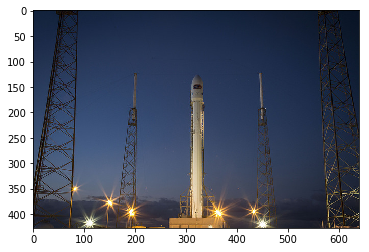

In [9]:
img = data.rocket()
imshow(img)
show()

In [10]:
print(img.shape)
print(img.dtype)

(427, 640, 3)
uint8


Når vi skriver ut `img.shape` for bildet av raketten ser vi at det står $(427, 640, 3)$, dette betyr at bildet er 427x600 pixler. Tretallet til slutt betyr at det for hver piksel er tre tall, en for hver av de tre fargene. 

Vi ser også at datatypen til bilder igjen er `uint8`, som betyr at hvert tall igjen er et heltall mellom 0 og 255. Forskjellen er nå at hver piksel består av tre slike tall, én for hver farge, som betyr at hver piksel egentlig nå består av $8+8+8 = 32$ piksler. På grunn av dette kalles av og til RGB-system for "32-bits farger".

Vi kan skrive ut fargene til én piksel som følger

In [11]:
print(img[0, 0])

[17 33 58]


### Dele opp et bilde i de ulike fargene

Siden det er et tall assosiert med hver av de tre primærfargene kan vi tolke fargebildet litt som tre separate gråtonebilder lagt over hverandre, slik som vist i bildet av emiren over. Disse tre bildene kalles *fargekanalene* til bildet.

Vi skal nå ta et eksempelbilde og dele det opp i fargekanalene sine. Denne gangen tar vi et eget eksempel bilde. Denne er lagret i bildefilen `peppers.png`, og ligger i en mappe som heter `fig`, denne mappen ligger ved siden av notebooken vår. Da kan vi laste inn bildet som følger:

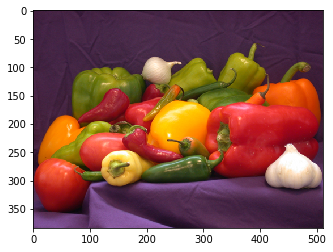

In [12]:
img = imread("fig/peppers.png")

imshow(img)
show()

For å trekke ut fargekanalene bruker vi *indekssering*. De to første indekssene angir hvilken piksel det er snakk om, men vi vil ha alle piksler, så vi skriver `:, :` for de to første indeksene, som betyr *alle*. For den tredje indeksen velger vi fargekanal, det er tre kanaler: RGB. Siden Python begynner å telle på 0 blir det da slik at vi har indeks 0 (rød), 1 (grønn) og 2 (blå).

In [13]:
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

print(red.shape)
print(green.shape)
print(blue.shape)

(384, 512)
(384, 512)
(384, 512)


Vi ser at hver av fargekanalene er et bilde med samme oppløsning. Vi kan nå plotte dem og se hvordan de ser ut. Siden vi nå bruker `imshow` på bilder med en tallverdi per pixel tolkes og vises det automatisk som gråtoner. Jo mørkere tonen er, jo mindre av den gitte fargen er i originalbildet - jo lysere tonen er, jo mer er det av fargen.

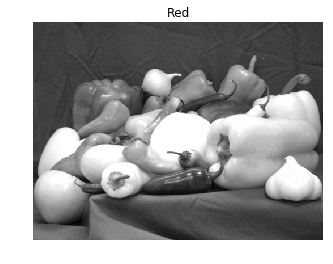

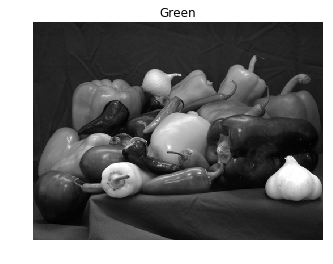

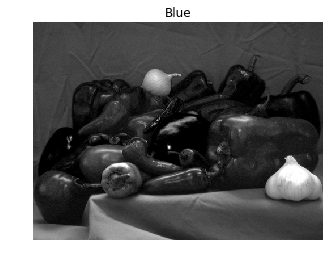

In [14]:
imshow(red)
axis('off')
title('Red')
show()

imshow(green)
axis('off')
title('Green')
show()

imshow(blue)
axis('off')
title('Blue')
show()

#### Eksempelspørsmål

* a) Hvorfor er den røde kanalen så mye lysere enn de to andre?
* b) Hvorfor er den blå så mørk?
* c) Hvilken farge er det mest av i originalbildet?
* d) Det eneste som er lyst i alle bildene er løkene. Hvorfor tror du hvitløken ser hvit ut på alle tre kanalene?

Det finnes et triks vi kan bruke for å vise de ulike kanalene separat, men i farger istedenfor gråtoner. Dette gjør vi ved å sette de to andre kanalene til 0, istedet for å trekke de spesifikke kanalene ut. Dette endrer hvordan `imshow` oppfører seg, fordi om den bare får én kanal antar den vi ønsker gråtoner, men om vi sender inn tre kanaler antar den vi ønsker RGB.

In [15]:
red = img.copy()
red[:, :, 1] = 0
red[:, :, 2] = 0

green = img.copy()
green[:, :, 0] = 0
green[:, :, 2] = 0

blue = img.copy()
blue[:, :, 0] = 0
blue[:, :, 1] = 0

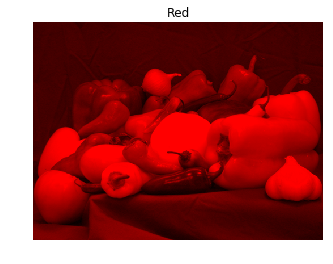

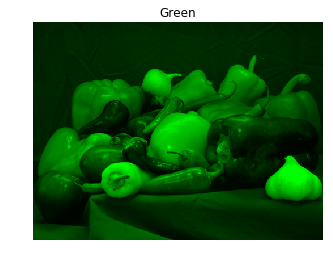

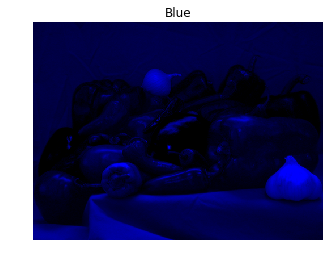

In [16]:
imshow(red)
axis('off')
title('Red')
show()

imshow(green)
axis('off')
title('Green')
show()

imshow(blue)
axis('off')
title('Blue')
show()

### Antall mulige farger

I bildet vi så på var datatypen fortsatt `uint8`. Dette betyr at hver piksel bestå av tre farger, som hver kan ha verdien 0-255. antall mulige fargekombinasjoner blir da:
$$256\cdot256\cdot256 = 16,777,216.$$
Det finnes altså godt over 16 millioner forskjellige farger i 32-bits RGB bilder. Menneskeøyner kan skille mellom omtrent 10 millioner farger, så over 16 millioner er veldig mange! Det er altså mange forskjellige farger i RGB som vil se helt like ut for oss.

Det finnes derimot noen andre begresninger i RGB som vi skal gå inn på etterhvert.

For å se mulighetene i RGB kan du bruke en [fargeplukker](https://www.w3schools.com/colors/colors_rgb.asp), disse finnes det mange av på nett, og de fleste tegneprogram har dem innebygd.

<img src="fig/fargeplukker.png" width=400></img>
Bilde: RGB-Fargeplukkeren i tegneprogrammet *Inkscape*, de andre knappene på toppen endrer til andre fargesystemer, som man kan bruke istedenfor RGB om ønskelig.


### RGB i skjermpiksler

En piksel i en dataskjerm, mobilskjerm eller på en TV består av tre subpiksler, én i hver farge. Når skjermen skal vise noe får pikselen beskjed om hvilke farger den skal vise som en RGB kode, deretter justeres lysstyrken til de tre subpikslene til de riktig verdiene. På avstand smelter de tre fargene sammen, og vi oppfatter resultatet som en enkelt piksel av den riktige fargen.

En piksel i en skjerm trenger forresten ikke bestå av faktiske små firkanter, de kan for eksempel være runde, eller tynne streker. Se på bilder under, hvor det er zoomet inn på skjermer laget med forskjellige teknologier. Fra avstand ser de nok helt like ut.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Pixel_geometry_01_Pengo.jpg/1024px-Pixel_geometry_01_Pengo.jpg" width=300></img>
(Bildet er tatt fra [Wikimedia Commons](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Pixel_geometry_01_Pengo.jpg/1024px-Pixel_geometry_01_Pengo.jpg) under [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/) lisens.)

### Konvertere fra farger til gråtoner

Nå som vi begynner å skjønne hvordan farger i digitale bilder fungerer, la oss se om vi klarer å konvertere et fargebilde til gråtoner. Vi bruker et nytt eksempelbilde fra skimage

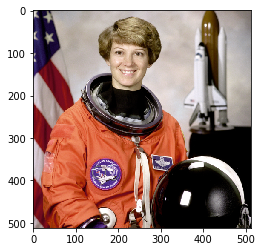

In [17]:
img = data.astronaut()

imshow(img)
show()

Istad så vi hvordan vi kan trekke ut de enkelte fargekanalene og vise frem kun disse


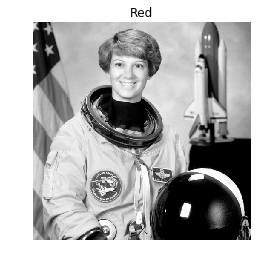

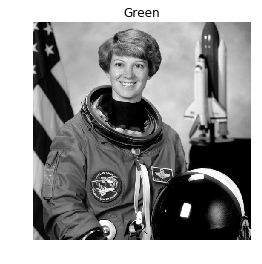

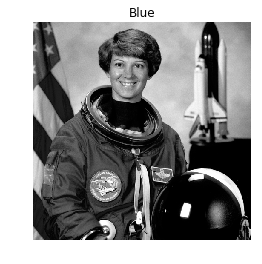

In [18]:
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

imshow(red)
axis('off')
title('Red')
show()

imshow(green)
axis('off')
title('Green')
show()

imshow(blue)
axis('off')
title('Blue')
show()

Disse tre bildene er jo gråtoner, men hvilken av dem er 'riktig'? Den midterste ser jo kanskje mest naturlig ut, så kanskje vi skal velge den? Vel, det finnes en bedre løsning: vi kan ta gjennomsnittet av de tre! Ved å ta gjennomsnittet får vi med informasjon fra alle tre fargekanalene, og blander dem til en miks der vi får med informasjon om lysintensiteten

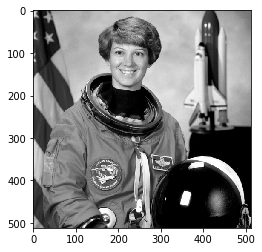

In [19]:
imshow(red/3 + green/3 + blue/3)
show()

Vi ser at gjennomsnittet av de tre fargene lager et bilde som ser veldig naturlig i gråtoner, dette er fordi vi har fått med informasjon fra alle tre primærfargene i sluttresultatet. 


I praksis er det slik at menneskesynet er flinkere til å se grønn, og dårligere til å se blått. For å lage et enda bedre gjennomsnitt burde vi derfor *vekte* grønn høyere, og blått svakere. Dette kalles for et *vektet* gjennomsnitt. Det viser seg at den blandingen av rød, grønn og blå som er best tilpasset det mennesklige synet er som følger:
* 29.9% rødt
* 58.7% grønnt
* 11.4% blått
Vi kan lage en funksjon som oversetter et fargebilde til gråtoner ved hjelp av denne vektingen:

In [47]:
def rgb2gray(img):
    red = img[:, :, 0]
    green = img[:, :, 1]
    blue = img[:, :, 2]
    gray = 0.299*red + 0.587*green + 0.114*blue
    return gray

Nå kan vi teste på et nytt fargebilde. Her prøver jeg på et bilde av megselv:

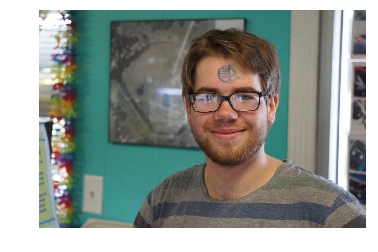

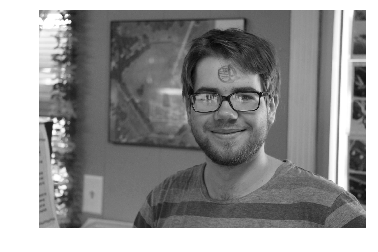

In [48]:
img = imread("fig/jonas.jpg")

gray = rgb2gray(img)

imshow(img)
axis('off')
show()

imshow(gray)
axis('off')
show()

### Eksempel: Skru av farger i et bilde selektivt

Vi har nå sett hvordan vi kan gjøre et fargebilde om til gråtoner. La oss se hvordan vi kan bruke det vi har lært til å skru av visse farger i et bilde. Som eksempel bruker vi et bilde fra filmen Matrix. I denne scenen er poenget at Neo skal legge merke til personen i rød kjole, fordi hun er den eneste som går i farger, mens alle de andre går i svarte klær. La oss prøve å forsterke denne effekten enda mer, ved å la resten av bilde være i gråtoner, mens kjolen forblir rød.

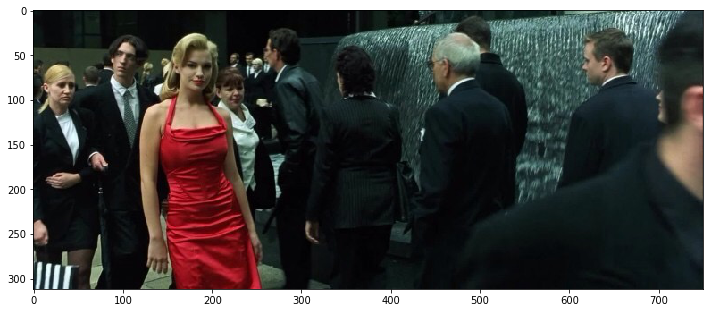

In [22]:
figure(figsize=(12, 8))
img = imread("fig/matrix_red_dress.jpg")
imshow(img)
show()

Vi har lyst å gjøre alt i bildet svart-hvitt, unntatt kjolen. Vi prøver først å gjøre om den blå og den grønne kanalen til gråtoner, men lar den rød kanalen være. Hva skjer?

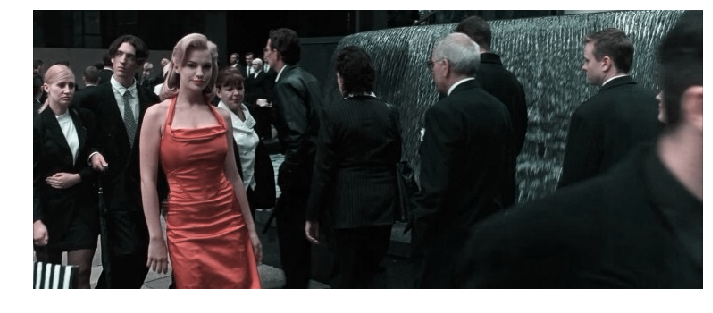

In [23]:
# Laster inn bilde fra fil
raw_img = imread("fig/matrix_red_dress.jpg")

# Henter ut gråtoner og fargekanaler
gray = rgb2gray(raw_img)
red = raw_img[:, :, 0]
green = raw_img[:, :, 1]
blue = raw_img[:, :, 2]

# Lag en ny variant av bildet, så vi ikke endrer originalen
img = raw_img.copy()

# "Skru av" grønn og blå kanal
img[:, :, 1] = gray
img[:, :, 2] = gray

# viser bildet
figure(figsize=(12, 8))
imshow(img)
axis('off')
show()

Vi ser at en del av fargene er forsvunnet, men bildet er ikke helt i gråtoner, for det er fortsatt rødskjær i for eksempel hudfargene. Samtidig er kjolen blitt noe vasket ut og den har blitt litt blass. Dette er fordi vi har endret på de grønne og blå fargene i kjolen, som er en viktig del av helhetsinntrykket.

La oss prøve noe annet. Det vi egentlig ønsker å gjøre, er å la alt bli gråtoner, bortsett fra kjolen, som vi skal la være som originalt. Så det vi egentlig trenger å gjøre er å finne en måte å trekke ut kjolen fra resten av bildet. Vi kan først prøve å gjøre dette ved å plukke ut alle piksler som har mye rødt i seg

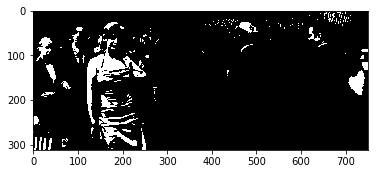

In [24]:
dress = red > 150
imshow(dress)
show()

Vi ser at denne taktikken ikke fungerer så bra. Vi ser for eksempel at den lyse huden slår ut, fordi den inneholder mye rødt (men har samtidig mye grønnt og blått, så den ser ikke så rød ut på bildet), samtidig er deler av kjolen *ikke* innafor, fordi den blir for mørk, og mørk farge tilsvarer lite rødt (og enda mindre blått og grønnt, som er grunnen til at det ser rødt ut).

Det vi heller bør gjøre, er å se etter piksler som er *mye mer røde enn de er blå eller grønne*

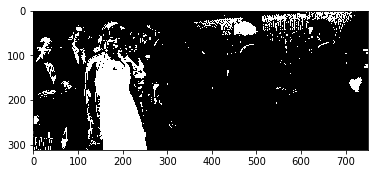

In [25]:
dress = red > (green + blue)
imshow(dress)
show()

Dette fungerer langt bedre, for nå har vi fått med hele kjolen. Derimot har vi fortsatt litt mye annet med på kjøpet. La oss prøve å dele de opp og si at pikslene må være *både* mye mer rød enn grønn, *og* mye mer rød enn blå. 

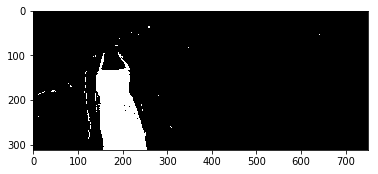

In [26]:
dress = (red > 2.5*green)*(red > 2.2*blue)
imshow(dress)
show()

Der sittern! Nå gjør vi først hele bildet grått, men så gjør vi pikslene som svarer til kjolen om til originalbildet.

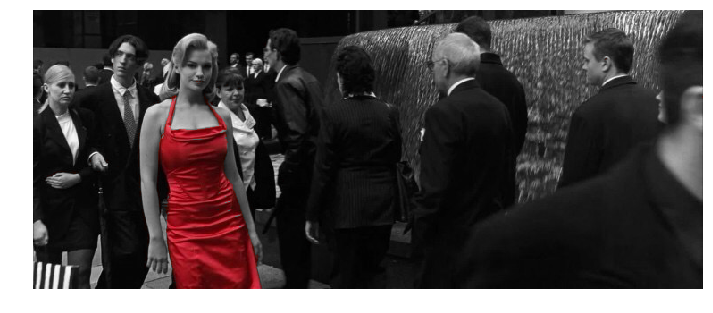

In [27]:
img = raw_img.copy()
img[:, :, 0] = gray
img[:, :, 1] = gray
img[:, :, 2] = gray

img[dress] = raw_img[dress]

figure(figsize=(12, 8))
imshow(img)
axis('off')
show()

## Mennesklig syn

Vi har nå sett litt på hvordan digitale farger kan bygges opp som en kombinasjon av primærfargene i digitale bilder. Det som er litt stilig er at RGB-systemet ligner veldig på mennesklig syn!

Når vi ser med øynene våre er det fordi lys går igjennom øyet og treffer *netthinnen*. Netthinnen er et omeråde mot baksiden av øyet fyllt med celler som er sensitive for å ta imot lys. Disse cellene mottar lyset og sender signaler til hjernen som tolker signalene. Disse kaller vi lysreseptorer.

I netthinnen har vi to typer lysreseptorer: staver og tapper. Disse reseptorcellene er utrolig små: et vanlig menneskeøye har omtrent 6 millioner tapper og 130 millioner staver. Tappene er ansvarlig for fargesyn, mens stavene ikke bryr seg om farge, de ser bare lysintensitet, det vil si, lys og mørke.

Tappene, som gir oss fargesynet, kan igjen deles i tre reseptorer, som svarer på forskjellige farger. Som du kanskje kan gjette på nå er disse reseptorene responsive på rødt, grønnt og blått lys. Vi sier at mennesker er *trikromatiske*, siden vi har reseptorer som ser tre forskjellige farger ("kroma" er gresk og betyr farge). Hvis det er mørkt blir tappene mindre aktive, og stavene tar mer over. Når man har godt mørkesyn ser man altså også automatisk mindre farger og synet blir mer svart-hvitt.

<img src="fig/em_spektrum.png" width=600></img>

Det er ikke tilfeldig at digitale skjermer og bilder er laget for å gi rødt, grønnt og blått lyst, når det er dette menneskesynet svarer best på. Skjermene er spesialdesignet på denne måten for å gjengi flest mulig av de fargene mennesker kan se. Noen dyr, for eksempel mange fugler, er *tetrakromater* (tetra betyr 4), som betyr at disse fuglene trenger 4 primærfarger for å gjenngi alle farger de kan se (den fjerde primærfargen er UV lys, som mennesker ikke kan se). For en fugl er nok fargene på en dataskjerm ganske tamme og litt kjedlige, for de mangler UV delen av fargene.

## Fargeblindhet

Det finnes mange som ikke ser farger på samme måte som andre mennesker, og disse kalles gjerne for *fargeblinde*. Ordet *fargeblinde* får det til å høres ut som man ikke kan se farger i det heletatt, og ser alt i gråtoner, slik er det ikke. Det finnes noen som ser i gråtoner, men det er *ekstremt* sjeldent. De fleste som er fargeblinde ser fortsatt farger, men de ser noe mindre farger enn vanlig.

Den vanligste fargeblindheten er rød-grønn fargeblinde, vi kaller det *rød-grønn* fargeblind, fordi man ikke klarer å skille røde og grønne farger. Når vi ser på bildet over ser vi at rød og grønn ligger veldig nærme hverandre i måten tappene våre ser farger. Hos noen ligger disse enda mer over hverandre, og reseptorene i øynene svarer helt likt på rød og grønne farger - derfor kan man ikke skille på dem lenger.

En annen mulighet er at man kan mangle tapper av en type, om man mangler de røde eller de grønne tappene vil man heller ikke kunne skille rød og grønn (det går også ann å mangle de blå tappene, men dette er mer sjeldent). Det å ha en form for fargeblindhet er egentlig ganske vanlig, på verdensbasis er 8% av alle menn fargeblinde, men bare 0.3% kvinner.

La oss prøve å se om vi kan gjennskape det rød-grønn fargeblinde ser ved hjelp av programmering.

#### Simulere Rød-Grønn fargeblindhet

Siden rød-grønn fargeblinde ikke klarer å skille på røde og grønne farger kan vi tenke oss at vi kan simulere effekten ved å blande sammen den røde og den grønne kanalen i et bilde. La oss prøve med et testbilde av en hage full av blomster (bildet er hentet fra [colorblindawareness.org](http://www.colourblindawareness.org/colour-blindness/colour-blindness-experience-it/) slik at vi kan sammenligne resultatet vårt med den mer fancy simulatoren deres).

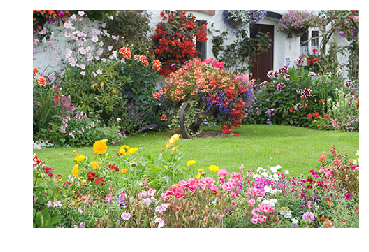

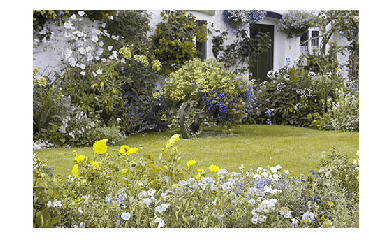

In [28]:
# Laster inn filen flowers.jpg
img = imread("fig/flowers.jpg")

# Vis originalbilde
imshow(img)
axis('off')
show()

# Plukk ut de forskjellige fargekanalene
rød = img[:, :, 0]
grønn = img[:, :, 1]
blå = img[:, :, 2]

# Lag en ny fargekanal som er en blanding av rød og grønn
rødgrønn = 0.5*rød + 0.5*grønn

# Lag en kopi av originalbilde
fargeblind = img.copy()

# Bytt ut både den røde og grønne kanalen med den nye blandingen vi har laget
fargeblind[:, :, 0] = rødgrønn
fargeblind[:, :, 1] = rødgrønn

# Vis det simulerte fargeblinde bildet
imshow(fargeblind)
axis('off')
show()

Vi ser at når vi blander den røde og grønne kanalen får vi et bilde som ikke inneholder noe særlig grønnt og rødt! Gressfargen er blitt mer gulaktig, og de røde blomstene ser vi ikke lenger, for de har samme farge som bakgrunnen. De blå og gule blomstene ser vi fortsatt godt. De rosa og lilla blomstene er blitt mer blå eller hvite, for vi klarer ikke å se rødfargen så godt lenger - og slik er det faktisk, rød-grønn fargeblinde sliter samtidig å se forskjellen på blå og lilla.

**Eksempeloppgave:** Skriv en funksjon som tar et vilkårlig fargebilde og gir et bilde tilbake som simulerer rød-grønn fargeblindhet.

**Fasit:**

In [29]:
def fargeblindhet_simulator(img):
    rød = img[:, :, 0]
    grønn = img[:, :, 1]
    blå = img[:, :, 2]
    
    rødgrønn = 0.5*rød + 0.5*grønn
    fargeblindt_bilde = img.copy()
    fargeblindt_bilde[:, :, 0] = rødgrønn
    fargeblindt_bilde[:, :, 1] = rødgrønn
    
    return fargeblindt_bilde

Nå som vi har en funksjon kan det være interessant å prøve den ut på litt forskjellige bilder. La oss første prøve å ta et bilde av et helt fargehjul

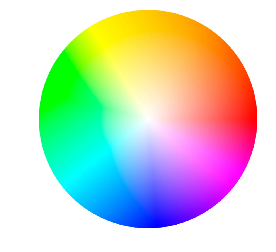

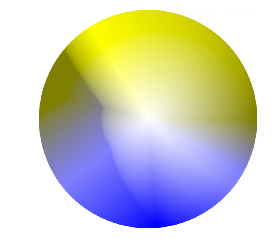

In [30]:
# Last inn bildet
img = imread("fig/fargehjul.png")

# Vis originalen
imshow(img)
axis('off')
show()

# Vis rød-grønn fargeblind versjon
imshow(fargeblindhet_simulator(img))
axis('off')
show()

La oss også teste en fargeblindhetstest

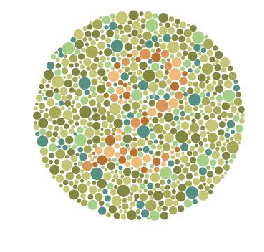

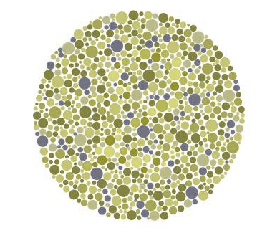

In [31]:
img = imread("fig/fargeblind_test.jpg")

# Vis originalen
imshow(img)
axis('off')
show()

# Vis rød-grønn fargeblind versjon
imshow(fargeblindhet_simulator(img))
axis('off')
show()

Måten vi simulerer rød-grønn fargeblindhet her er noe overforenklet, og det er smånyanser vi ikke inkluderer. Om du vil se bedre simuleringer kan du ta en titt på nett, der finnes det mange simulatorer på nett, for eksempel på [colorblindawareness.org](http://www.colourblindawareness.org/colour-blindness/).

### Fargehesteskoen

Lys er elektromagnetisk stråling med bølgelengder mellom omtrent 400 og 700 nm. Hver bølgelengde er knyttet til en bestemt farge, der hele spekteret ser ut som regnbuen. Det er dette som vises i figuren lenger oppe. Det er ganske vanlig å tegne det elektromagnetiske spekteret langs en rett linje på denne måten, der aksen bortover er økenge bølgelengde.

En annen måte å tegne spekteret på, er som en hesteskoform, der bølgelengdene øker med klokka rundt kanten på hesteskoen. Grunnen til at vi tegner den på denne måten er at vi kan nå også forstå hvordan farge det blir på lys dersom vi blander forskjellige bølgelengder! Måten vi gjør det på er å trekke en strek mellom bølgelengdene som blandes, og der de krysser finner vi fargen vi ser.

En dataskjerm har lysdioder som sender ut rødt, grønnt og blått lys. Så hvis vi setter en prikk på disse tre fargene i hesteskoen lager vi et trekant. En dataskjerm kan lage alle farger innenfor denne trekanten. Ved å endre hvor kraftig de tre forskjellige lysdiodene lyser så flytter man seg rundt inne i trekanten.

En dataskjerm kan derimot ikke lage noen av fargene *utenfor* trekanten. I bildet under av en slik fargehestesko ser det ikke ut som vi går glipp av så mye, men det er jo fordi bildet vises frem på en dataskjerm!

<img src="fig/fargesko.png" width=400></img>


## Dataskjerm eller Fargeprinter

Vi har snakket mye om RGB fargesystemet, og dette er veldig mye brukt og veldig viktig, men det er ikke det eneste som finnes. Om du for eksempel åpner bildehandlingsprogramvare kan du ofte se lange lister over ulike fargesystemer som brukes til diverse formål. De fleste av disse formatene er forkortelser, for eksempel CYMK og YCbCr. Forskjellige fargesystemer er laget for forskjellige formål og teknologier. La oss se på CMYK som et eksempel.

Som vi har forklart fungerer RGB bra for å forklare lys, for eksempel det lyset dataskjermen vår sender ut. Det er slik at om vi blander lys av forskjellig farge sammen får vi et sterkere og hvitere lys. Om vi blander alle fargene sammen får vi helt hvitt lys. Dette er grunnen til at sollys er hvitt, solen sender ut lys med masse forskjellige bølgelengder, så vi tolker denne blandingen som hvit.

Om vi skal skrive ut noe på et ark, eller male et maleri, fungerer det derimot annerledes. Da er det ikke lenger slik at å blande sammen farger gjør dem lysere, istedet blir de mørkere! Dette er fordi maling og blekk er laget for å absorbere lys, det er det de *ikke* absorberer som vi ser. Så rødt blekk absorberer alle farger *unntatt* rødt. Når vi blander mange farger sammen absorberer de mer og mer farge til vi ikke får noe lys igjen i det heletatt, og det tolker vi som svart.

Vi kan si at RGB er *additiv*, fordi å legge sammen farger gjør dem lysere/sterke (som ved addisjon av to tall $a+b$), mens fargene i en printer er *subtraktive*, fordi å legge sammen farger gjør dem svakere/mørkere (som ved subtraksjon $a-b$. En fargemodel som beskriver den *subtraktive* fargeblandingen for en printer er CMYK. Her står CMY for "Cyan" (turkis), "Magenta" (rosa) og "Yellow" (gul). Dette er primærfargene i modellen, og ved å blande dem kan vi få alle andre farger. Til slutt har vi "k", som står for "key", som egentlig bare er svart. Grunnen til at vi inkluderer svart, er at det ville vært altfor dyrt å blande sammen masse fargeblekk hver gang vi skulle hatt svartfarge, da er det billigere å ha svart blekk, som koster mye mindre enn fargeblekk. I tilegg er det vanskelig å lage en fin svartfarge ved å blande farger. Du har kanskje prøvd dette selv med maling, om man blander sammen masse farger får man gjerne en mørk brunaktig farge eller en dyp grå, men det blir liksom aldri helt svart, så da er det lettere å bare bruke svart maling

<img src="fig/rgb_vs_cymk.png" width=600></img>

**Tankespørsmål:** Hvordan får vi hvit i CMYK modellen? Kan en printer skrive ut hvit? På samme måte, hvordan lager en projektor svarte farger? Kan en projektor projisere "svart" lys?


# Filtere

Vi skal nå snakke litt om bildefiltere. Vi har nok alle hørt om filtere, ihvertfall om man bruker instagram eller snapchat! Men hva er egentlig et bildefilter? Et bildefilter er ganske enkelt en funksjon som tar et bilde inn, gjør noen endringer på det og sender et annet bilde tilbake. I programmering vil altså et filter kunne lages som en funksjon og brukes som `filter(bilde)`. Men dette har vi jo gjort mange ganger så langt. Det stemmer, vi har laget flere bildefiltere i dette opplegget allerede. For eksempel er `rgb2gray()` og `fargeblindhet_simulator` funksjonene vi lagde eksempler på bildefiltre, og vi lagde disse helt fra bunnen av.

Vi skal ikke lage noen flere filtre fra bunn av, men nå skal vi istedet bruke et par innebygde filtre i `skimage`. Disse filtrene er laget for å brukes til å analysere og forstå bilder, ikke nødvendigvis for at bilder skal se mer fancy eller morsomme ut - så disse filtrene er litt annerledes enn de filtrene vi finner i insta/snap. De er også gjerne oppkalt av de som fant dem opp, så navnene på dem er kanskje litt kryptiske.

### Chelsea

Som eksempelbilde bruker vi et av de innebygde filtrene i skimage pakken, denne gangen av katten *Chelsea*

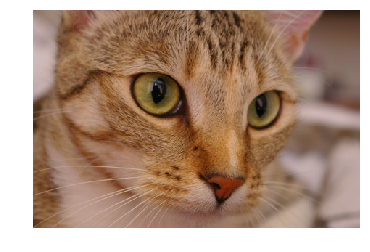

In [32]:
chelsea = data.chelsea()
imshow(chelsea)
axis('off')
show()

Filtrene vi skal se på fungerer kun på gråtonebilder, så vi bruker `rgb2gray()` funksjonen du lagde tidligere for å konvertere bildet til gråtoner. (Hvis du ikke har laget denne selv kan du bruke `skimage.color.rgb2gray()` som gjør dette for deg.

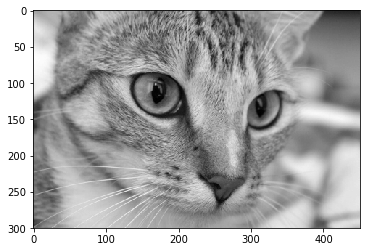

In [33]:
chelsea_gray = rgb2gray(chelsea)
imshow(chelsea_gray)
show()

### Sobelfilteret finner konturer

Det første filteret vi skal se på heter ett *Sobel*-filter. Et Sobel filter finner områder i et gråtonebilde der fargene endrer seg raskt, det vil si der det går fra svart til hvitt eller motstatt. Filteret er altså god på å finne overganger og konturer i et bilde. For eksempel kanter og mønstre.

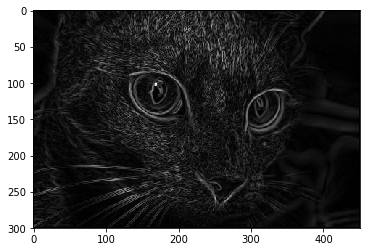

In [34]:
from skimage.filters import sobel

konturer = sobel(chelsea_gray)
imshow(konturer)
show()

Vi ser på bildet av katten at øynene, nesa og deler av værhårene er det som kommer ut av Sobel-filteret, dette er fordi det er der det er tydligst skiller i originalbildet. La oss bruke et annet eksempelbilde også

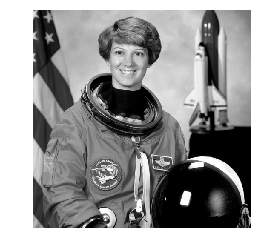

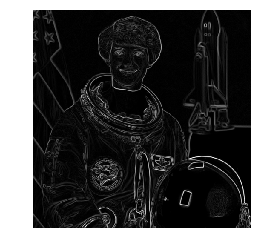

In [35]:
img = data.astronaut()
gray = rgb2gray(img)

imshow(gray)
axis('off')
show()

imshow(sobel(gray))
axis('off')
show()

Sobelfilteret er veldig viktig, for konturer gjør det lett å dele ett bilde opp i forskjellige objekter. Å tolke bilder er veldig vanskelig for en datamaskin, men vi ser at ved å bruke Sobel kan det være enklere å plukke ut interessante objekter.

### Otsu-filter deler et bilde i forgrunn og bakgrunn

Vi har sett hvordan vi kan gjøre fargebilder om til gråtonebilder, men nå skal vi gå ett steg til å gjøre dem helt svart-hvitt. Det vil si, vi skal kun bruke helt hvit, eller helt svart. Dette kalles et *binærbilde* fordi vi bare har 2 farger, og *binært* betyr at noe er laget av to ting/komponenter. 

Det er veldig enkelt å lage et binærbilde om vi har et gråtonebilde, vi bare bestemmer oss for en grense og sier at alle farger som er mørkere enn grensen skal være svarte, og alle farger som er lysere enn grensen, skal være hvite. La oss ta et eksempel. Husk at bilder ofte har tallverdier mellom 0 og 255. Så la oss prøve å dele bildet helt på midten, dvs, ved 128. Da skriver vi bare `chelsea_gray > 128`. Når vi skriver dette går Python igjennom hver piksel i bildet og sjekker, er verdien større enn 128 ($>128$) så blir resultatet "1", som betyr *sant*, og om verdien er mindre enn 128 så blir resultatet "0", som betyr *falskt*. Resultatet lagrer vi i en ny variabel.

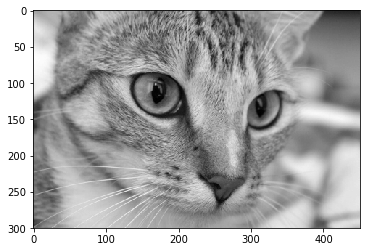

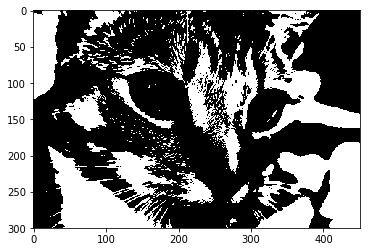

In [36]:
imshow(chelsea_gray)
show()

svarthvitt = chelsea_gray > 128

imshow(svarthvitt)
show()

Vi ser at Binærbilde av Chelsea ble ganske bra, vi ser ihvertfall fortsatt at det er en katt! Men kanskje bildet er litt vel mørkt, så vi bør redusere grensen vår litt. Kanskje vi skulle prøvd med en grense på 100?

Her er det et filter som gjør jobben for oss. *Otsu*-filteret velger automatisk grensen man bør bruke for å lage et binærbilde. Den gjør dette ved å først regne seg frem til hvilken grense som gir oss mest detaljer. La oss prøve på to forskjellige bilder. Funksjonen `filters.threshold_otsu()` tar et bilde inn, og gir oss grenseverdien tilbake, ikke et ferdig bilde. Så vi må først bruke Otsu for å finne grensen, så lage binærbildet selv. Ordet `threshold` er engelsk og betyr *terskel* eller *grense*

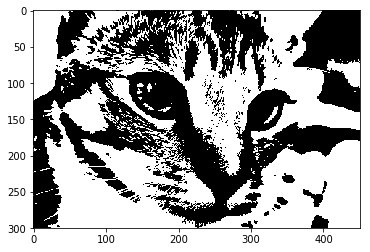

In [37]:
from skimage.filters import threshold_otsu

grense = threshold_otsu(chelsea_gray)
svarthvitt = chelsea_gray > grense

imshow(svarthvitt)
show()

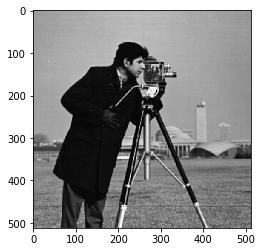

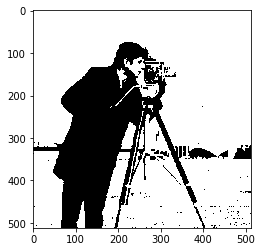

In [38]:
# Dette er også et gråtone bilde, så vi trenger ikke konvertere det til gråtoner
img = data.camera()

# Vis originalbildet
imshow(img)
show()

# Bruk Otsu til å finne grense og lag et binærbilde med grensen
grense = threshold_otsu(img)
svarthvitt = img > grense

# Vis frem binærbildet
imshow(svarthvitt)
show()

Binærbilder, spesielt funnet ved hjelp av Otsu, brukes også masse i digital bildegjenkjennig. På samme måte som konturer kan det hjelpe for å plukke ut interessante objekter eller mønstre. Samtidig blir bildet mye enklere, som gjør at det kan være lettere for datamaskinen å analysere eller endre på det etterpå.

### Gaussisk filter gjør ting uklare

De neste filtrene vi skal se på heter *blurs* på engelsk. *Blur* betyr uskarpt, så disse filtrene gjør bilder mindre skarpe. På TV og film, spesielt i detektivserier, ser man gjerne at folk bruker filtre som gjør bilder *skarpere* enn de er, de kaller de sier gjerne "enhance", eller noe lignende. Men dette går egentlig ikke. Vi kan ikke få *mer* detaljer ut av et uklart bilde. Men *blurs* gjør altså ting *mindre skarpe*, og det er fullt mulig.

For å forstå hvordan blurs fungerer må vi først tenke oss hvordan vi kan ta "gjennomsnittet" av et bilde. Vi har jo sett at et bilde bare er en lang rekke tallverdier, ett tall for hver piksel (i et gråtonebilde) Så vi kan ta gjennomsnittet av et helt bilde ved å summere alle tallene og dele på antall piksler. Først finner vi antall piksler, det gjorde vi med `.shape()`

In [39]:
print(chelsea_gray.shape)

(300, 451)


Bildet er altså 300 piksler i høyden, og 451 i bredden. Eller totalt 
$$300 \times 451 = 135300$$
piksler. For å finne summen av alle pikselverdiene kan vi bruke `sum()`.

In [40]:
antall_piksler = 135300
gjennomsnitt = chelsea_gray.sum()/antall_piksler

print(int(gjennomsnitt))

115


Så gjennomsnittet er en gråfarge omtrent på midten av (0, 255). Vi kunne funnet dette enda enklere med `.mean()`. ("mean" er engelsk og betyr gjennomsnitt)

In [41]:
print(int(chelsea_gray.mean()))

115


Siden dette bare er ett tall, kan vi ikke vise det frem som et bilde, men vi kan skrive ut gråtoneskalaen ved siden av originalbildet og vise den

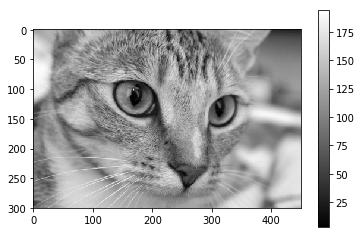

In [42]:
imshow(chelsea_gray)
colorbar()
show()

Så hvorfor snakker vi så mye om å ta gjennomsnittet av bilder? Vel, det å bruke en *blur*, eller å gjøre det mindre skarpt, er egentlig bare å ta gjennomsnitt av pikselverdiene, men man gjør det ikke med hele bildet, man gjør det med små biter av bildet. Du kan tenke på det litt som om det var et maleri der fargene ikke hadde tørket helt enda, det *blur*-filtre gjør er å gå over bildet med en liten pensel og blande ut små områder litt granne. Piksler vil altså ligne mer på nabopikslene sine etter et blur-filter er brukt.

Det finnes flere *blur*-filtere, men resultatene blir ganske like. Vi bruker `filters.gaussian` som eksempel. Vi sender inn et tall i tilegg til bildet som skal endres. Tallet som sendes inn er er størrelsen på området gjennomsnittet taes over: jo større tall, jo mer uskarpt blir bildet. Du kan tenke på det som å bruke en større pensel i malerimetaforen vår - jo større pensel, jo mer farger blir blandet sammen og jo mer uklart blir bildet.

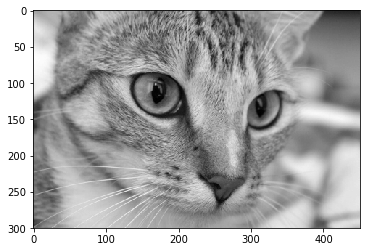

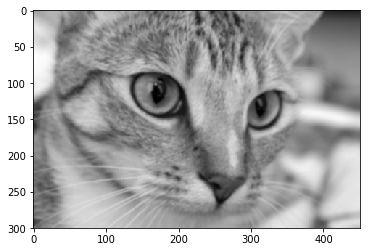

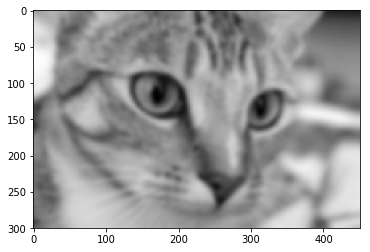

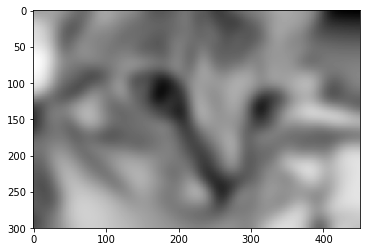

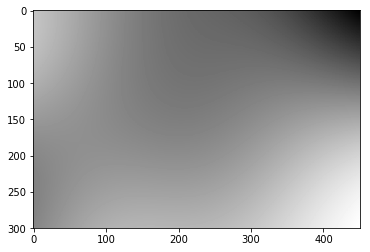

In [43]:
from skimage.filters import gaussian

imshow(chelsea_gray)
show()

blurred = gaussian(chelsea_gray)
imshow(blurred)
show()

blurred3 = gaussian(chelsea_gray, 3)
imshow(blurred3)
show()

blurred10 = gaussian(chelsea_gray, 10)
imshow(blurred10)
show()

blurred100 = gaussian(chelsea_gray, 100)
imshow(blurred100)
show()

Men hvorfor er vi egentlig interessert i å gjøre et bilde *mer uskarpt*, altså *mindre skarpt*. Vi ødelegger jo kvaliteten på bildet! Om originalbildet vi begynner med er veldig klart og tydelig er det sånn ja, og da bruker vi gjerne ikke filtere. Men mange bilder vil ofte inneholde det vi kaller *støy*, som ikke egentlig skal være med i bildet, men de sniker seg inn på grunn av for eksempel dårlig lysforhold eller dårlig kamerautstyr, la oss se på et eksempel.

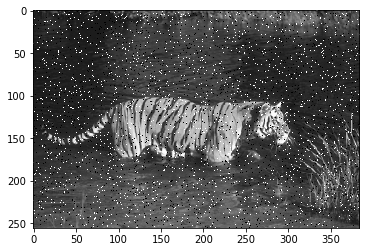

In [44]:
img = imread("fig/tiger.png")
imshow(img)
show()

Dette bildet av en en tiger er egentlig skarpt og fint, men det har masse støy over seg. Denne typen støy kalles *salt-og-pepper*-støy, fordi det ser ut som noen har spredd salt og pepper utover bildet. Når vi ser på bildet ser det ut som det er masse støy, men merk at støyen stort sett er enkelte piksler, som betyr at dersom vi tar gjennomsnittet hviskes denne støyen ut. La oss prøve

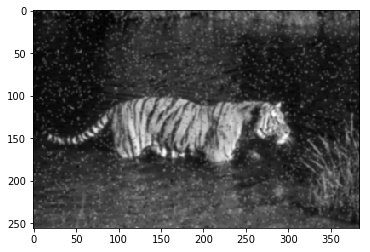

In [45]:
blurred = gaussian(img, 1)
imshow(blurred)
show()

Vi ser at filteret fjerner støyen ganske bra. Om vi øker til 2 eller 3 blir støyen mer eller mindre helt borte, men samtidig blir blir resten av bildet veldig uklart. Det er altså en balanse mellom hvor mye støy vi vil fjerne og hvor klart bilde vi vil ha. Det finnes også andre måter å fjerne støy på fra et bilde, og hvilken metode vi bruker avhenger av hva slags bilde og hva slags støy vi har.

Et *blur*-filter brukes gjerne også som første steg i digital bildeanalyse, fordi de fleste bilder er altfor kompliserte for datamaskiner å forstå uansett, så vi kan like greit forenkle bildet litt og fjerne litt støy. Ta for eksempel bildet av katten Chelsea. Når vi finner konturene finner vi masse små forandringer i pelsen til katten, men om først bruker en *blur* og så en *Sobel*, så ser vi mindre av disse små detaljene, mens de sterkere konturene rundt øynene og nesen blir tydligere.

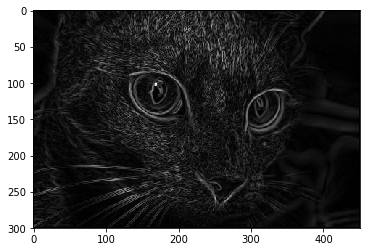

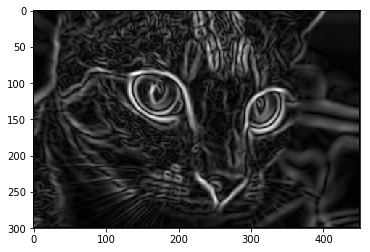

In [46]:
# Bruk bare Sobel filter
konturer = sobel(chelsea_gray)
imshow(sobel(chelsea_gray))
show()

# Bruk først Gaussisk, så Sobel filter
blurred = gaussian(chelsea_gray, 2)
konturer = sobel(blurred)
imshow(konturer)
show()

### Mer detaljer om filtere

Om du ønsker å gjøre et lite dypdykk i hvordan filtrene vi nå har gått igjennom fungerer, så er det ikke supervanskelig. *Computerphile*, på Youtube, har laget en rekke videoer som beskriver disse filtrene og forklarer matematikken bak dem i litt mer detalj. Disse videoene er et veldig fint utgangspunkt for å begynne å utforske matematiske filtre og hvordan de brukes i digital bildebehandling.

Du kan for eksempel begynne med denne videoen:

<a href="http://www.youtube.com/watch?feature=player_embedded&v=C_zFhWdM4ic
" target="_blank"><img src="http://img.youtube.com/vi/C_zFhWdM4ic/0.jpg" 
alt="IMAGE ALT TEXT HERE" width="240" height="180" border="10" /></a>

Link til videoen: [How Blurs & Filters Work - Computerphile
](https://www.youtube.com/watch?v=C_zFhWdM4ic)